# Simple Linear Regression using Gradient Descent.

In [1127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy import linalg as lg

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_regression 

import plotly.express as px
import plotly.graph_objects as go

# Main Topic

In [1128]:
sample_size = 100
X, Y = make_regression(n_samples=sample_size, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=100)
array_2D = np.hstack((X, Y.reshape(-1, 1)))

df = pd.DataFrame(array_2D ,columns=["Feature_1", ' Target '])
df
X.shape

(100, 1)

In [1129]:
reg = LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)

In [1130]:
beta_1 = reg.coef_
beta_not = reg.intercept_
beta_1, beta_not
y_predict  = (X*beta_1 + 100).reshape(sample_size)
beta_1, beta_not


(array([43.09090974]), -2.3190321902665074)

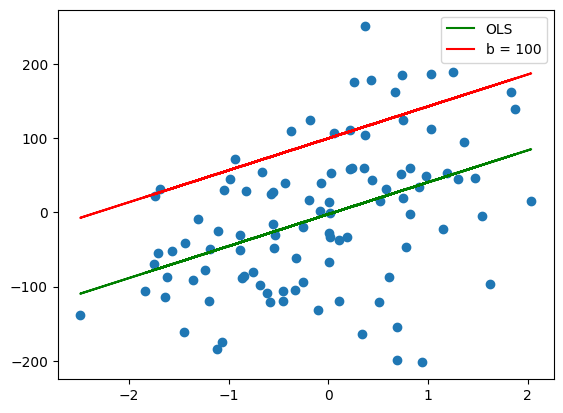

In [1131]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'green', label = "OLS") # blue

plt.plot(X, y_predict, color= 'red', label = 'b = 100')
plt.legend()


0.001


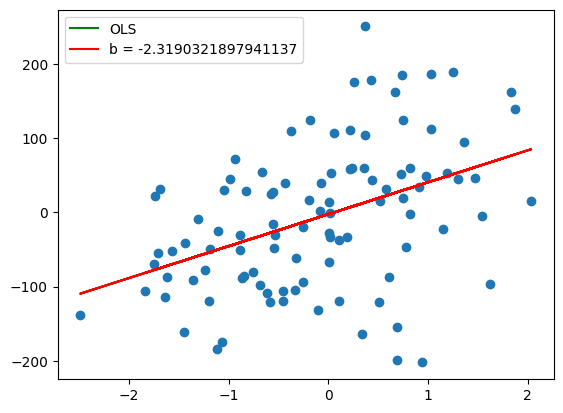

In [1132]:
b=0
lr = 1/(10*sample_size)
print(lr)
for i in range(100):
    loss_funct = -2 * np.sum(Y - beta_1 * X.ravel() - b)
    step_size = loss_funct * lr
    b = b - step_size
    y_predict3 = (X * beta_1 + b).reshape(sample_size)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'green', label = "OLS") # blue
plt.plot(X, y_predict3, color= 'red', label = f'b = {b}')
plt.legend()


In [1133]:
class LRGD:
    def __init__(self, learning_rate, epochs):
        self.beta_ = 1
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        self.sample_size = 0

    def fitgd(self, X, Y):
        self.sample_size = X.shape[0]
        for i in range(self.epochs):
            loss_funct_b = -2 * np.sum(Y - self.beta_ * X.ravel() - self.b)
            loss_funct_beta_ = -2 * np.sum((Y - self.beta_ * X.ravel() - self.b)*X.ravel())
            step_size_beta_ = loss_funct_beta_*self.lr
            step_size_b = loss_funct_b * self.lr
            self.b = self.b - step_size_b
            self.beta_ = self.beta_ - step_size_beta_
        return self.beta_ , self.b

    def predictgd(self, X):
        y_predict = (X * self.beta_ + self.b).reshape(self.sample_size)
        return y_predict

In [1134]:
lr = LRGD(0.001, 100)
lr1 = LinearRegression()

lr1.fit(X, Y)
lr.fitgd(X, Y)
lr_predict = lr.predictgd(X)
P_pred = lr1.predict(X)
print(f'beta = {lr.beta_} and intercept = {lr.b}')
lr1.intercept_, lr1.coef_

beta = 43.0909096163896 and intercept = -2.3190322907086323


(-2.3190321902665074, array([43.09090974]))

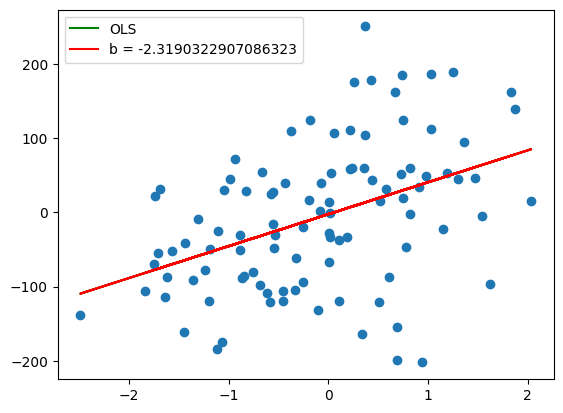

In [1135]:
plt.scatter(X, Y)
plt.plot(X, P_pred, color = 'green', label = "OLS")
plt.plot(X, lr_predict, color= 'red', label = f'b = {lr.b}')
plt.legend()
